## Text Classification and Sentiment Analysis on a Labeled dataset 
### Done by Galen Raphael Pereira


###  Reading datasets

In [1]:
train_x, train_y,test_x, test_y = [], [], [], []

#Function to read data from file

with open('Training.txt', "rb") as f:
    data = f.read()
for i in str(data)[2:-1].split("\\n"):
    if i[:10] in ["__label__1", "__label__2"]:
        train_x.append(i[11:].replace("\\r",""))
        train_y.append(i[:10])  
with open('Test.txt', "rb") as f:
    data = f.read()
for i in str(data)[2:-1].split("\\n"):
    if i[:10] in ["__label__1", "__label__2"]:
        test_x.append(i[11:])
        test_y.append(i[:10]) 


###  Pre-processing

In [4]:
# Load libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\galen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
#removing punctuation 
train_data_ver1,test_data_ver1 = [],[]
for i in train_x:
    train_data_ver1.append(i.translate(i.maketrans(' ', ' ', string.punctuation)))
for i in test_x:
    test_data_ver1.append(i.translate(i.maketrans(' ', ' ', string.punctuation)))

In [25]:
#Tokenizing the datas for train data
train_data_ver2,test_data_ver2 = [],[]
for i in train_data_ver1:
    train_data_ver2.append(word_tokenize(i))
for i in test_data_ver1:
    test_data_ver2.append(word_tokenize(i))

In [26]:
#Removing the stopwords for train data
train_data_ver3,test_data_ver3 = [],[]
stop_words = set(stopwords.words('english'))
for i in train_data_ver2:
    train_data_ver3.append([word for word in i if word.lower() not in stop_words])
for i in test_data_ver2:
    test_data_ver3.append([word for word in i if word.lower() not in stop_words])

In [27]:
#Removing all non alnums
train_data_version1,test_data_version1 = [],[]
for i in train_data_ver3:
    train_data_version1.append([word for word in i if word.isalnum()])
for i in test_data_ver3:
    test_data_version1.append([word for word in i if word.isalnum()])

In [28]:
#Making all tokens to lower case
train_data_version2,test_data_version2 = [],[]
for i in train_data_version1:
    train_data_version2.append([word.lower() for word in i])
for i in test_data_version1:
    test_data_version2.append([word.lower() for word in i])

In [29]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
#Lemmatizing and making ver3 for the data
lemmatizer = WordNetLemmatizer()
train_data_version3,test_data_version3 = [],[]
for i in train_data_version2:
    train_data_version3.append([lemmatizer.lemmatize(word) for word in i])
for i in test_data_version2:
    test_data_version3.append([lemmatizer.lemmatize(word) for word in i])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\galen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\galen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
print(train_data_version3[100])
print(train_data_version2[100])

['bah', 'review', 'cover', 'episode', '2', '4', 'much', 'alikei', 'delighted', 'first', 'one', 'gone', 'womanish', 'delicate', 'character', 'common', 'yaoi', 'replaced', 'two', 'strong', 'witty', 'male', 'involved', 'dangerous', 'adventuresi', 'know', 'second', 'episode', 'author', 'instead', 'pursuing', 'funfilled', 'path', 'gradually', 'making', 'two', 'men', 'fall', 'decided', 'take', 'serious', 'turn', 'melodramataki', 'heart', 'rending', 'uninteresting', 'past', 'come', 'back', 'literally', 'hunt', 'gone', 'fun', 'humour', 'light', 'hearted', 'adventure', 'replaced', 'endless', 'tear', 'guiltwe', 'back', 'obnoxious', 'routine', 'genre', 'made', 'please', 'romanceloving', 'straight', 'woman', 'gay', 'meni', 'guess', 'give']
['bah', 'review', 'covers', 'episodes', '2', '4', 'much', 'alikei', 'delighted', 'first', 'one', 'gone', 'womanish', 'delicate', 'characters', 'common', 'yaoi', 'replaced', 'two', 'strong', 'witty', 'males', 'involved', 'dangerous', 'adventuresi', 'know', 'secon

### EDA

In [31]:
# We have 2 dataset, train and test dataset, lets see the proportion of the pos and neg in each of
# these dataset
from collections import Counter
import matplotlib.pyplot as plt

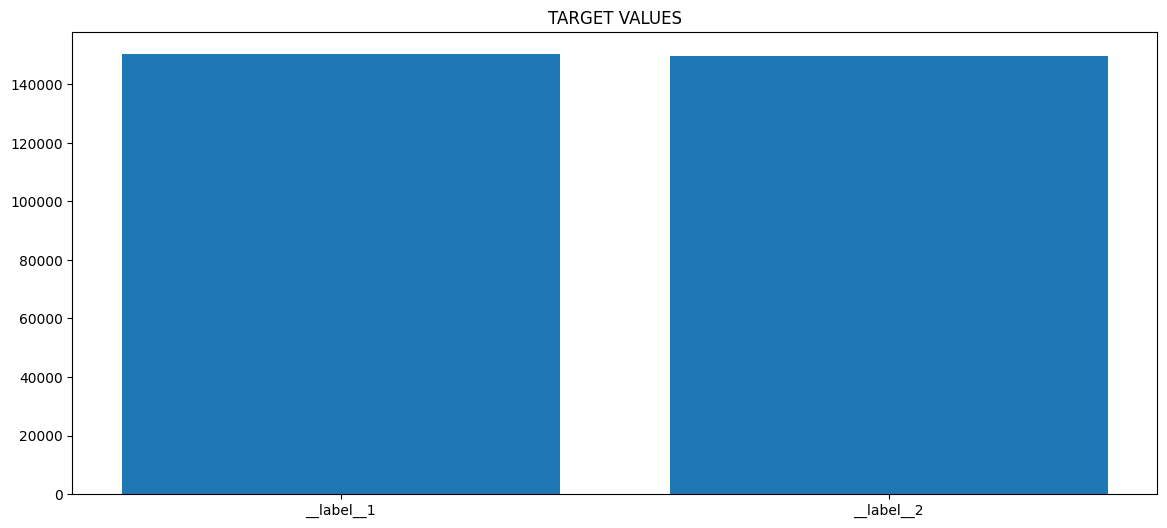

In [32]:
plt.figure(figsize=(14,6))
plt.title("TARGET VALUES")
sentiments_count_train = Counter(train_y)
sentiments_count_test = Counter(test_y)
plt.bar(sentiments_count_train.keys(), sentiments_count_train.values())
# plt.bar(test_y.keys(), Counter.values())
plt.show()

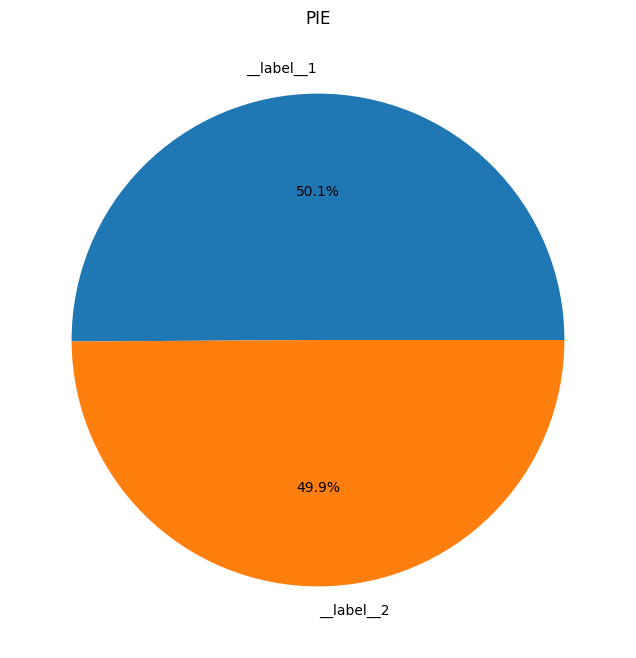

In [33]:
plt.figure(figsize=(12,8))
plt.title("PIE")
plt.pie(sentiments_count_train.values(), labels = sentiments_count_train.keys(), autopct='%1.1f%%')
plt.show()


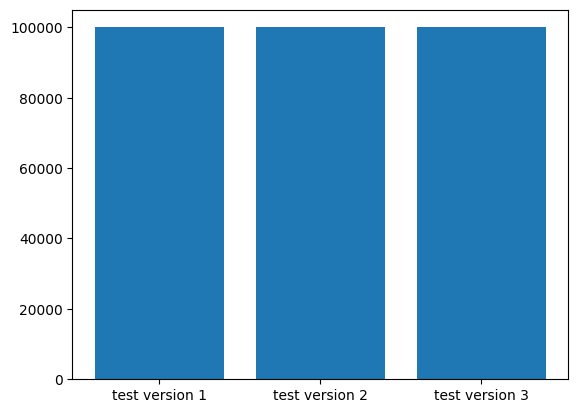

In [34]:
num_unique_ver1 = len(test_data_version1)
num_unique_ver2 = len(test_data_version2)
num_unique_ver3 = len(test_data_version3)
plt.figure()
plt.bar(['test version 1','test version 2','test version 3'], [num_unique_ver1,num_unique_ver2,num_unique_ver3])
plt.show()

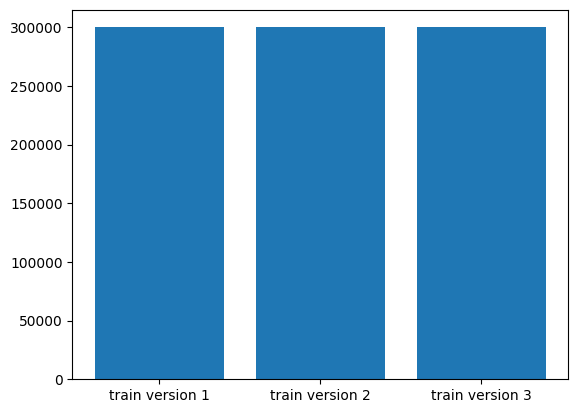

In [35]:
num_unique_ver1 = len(train_data_version1)
num_unique_ver2 = len(train_data_version2)
num_unique_ver3 = len(train_data_version3)
plt.figure()
plt.bar(['train version 1','train version 2','train version 3'], [num_unique_ver1,num_unique_ver2,num_unique_ver3])
plt.show()

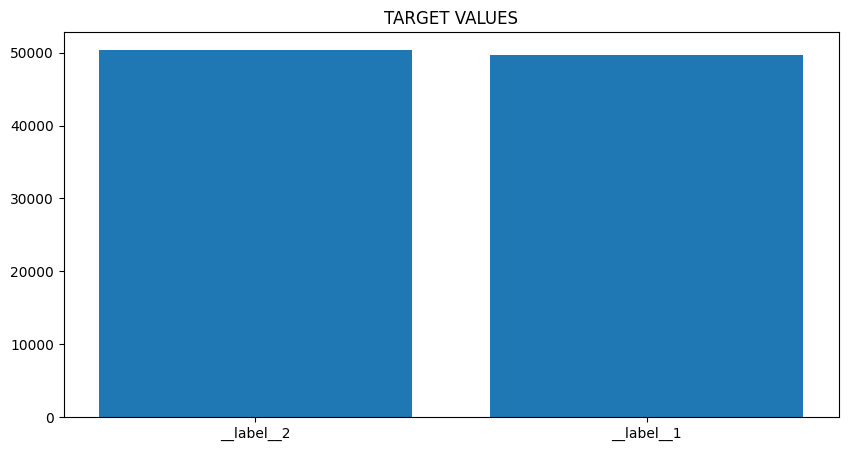

In [36]:
plt.figure(figsize=(10,5))
plt.title("TARGET VALUES")
sentiments_count_train = Counter(train_y)
sentiments_count_test = Counter(test_y)
plt.bar(sentiments_count_test.keys(), sentiments_count_test.values())
# plt.bar(test_y.keys(), Counter.values())
plt.show()

#### During the analysis we have seen less and less datas available from each version, due to different methods of clearing used. We can also notify in the both train and test dataset we have the similar amount of pos and neg datas.

### Sentiment classification using Machine Learning

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
def get_data(data):
    new_data = []
    for i in data:
        new_data.append(' '.join(s for s in i))
    return new_data
vectorizer = TfidfVectorizer()
X_train_version1_vec = vectorizer.fit_transform(get_data(train_data_version1))
X_test_version1_vec = vectorizer.transform(get_data(test_data_version1))
X_train_version2_vec = vectorizer.fit_transform(get_data(train_data_version2))
X_test_version2_vec = vectorizer.transform(get_data(test_data_version2))
X_train_version3_vec = vectorizer.fit_transform(get_data(train_data_version3))
X_test_version3_vec = vectorizer.transform(get_data(test_data_version3))

In [38]:
#MultinomialNB (supervised learning) model training for version 1
mnb1 = MultinomialNB()
mnb1.fit(X_train_version1_vec, train_y)
# MultinomialNB (supervised learning) model prediction for version 1 
y_pred1 = mnb1.predict(X_test_version1_vec)
print("version 1 accuracy = ", accuracy_score(test_y, y_pred1))

version 1 accuracy =  0.84146


In [39]:
#MultinomialNB (supervised learning) model training for version 2
mnb2 = MultinomialNB()
mnb2.fit(X_train_version2_vec, train_y)
# MultinomialNB (supervised learning) model prediction for version 2 
y_pred2 = mnb2.predict(X_test_version2_vec)
print("version 2 accuracy = ", accuracy_score(test_y, y_pred2))

version 2 accuracy =  0.84146


In [40]:
#MultinomialNB (supervised learning) model training for version 3
mnb3 = MultinomialNB()
mnb3.fit(X_train_version3_vec, train_y)
# MultinomialNB (supervised learning) model prediction for version 3 
y_pred1 = mnb3.predict(X_test_version3_vec)
print("version 3 accuracy = ", accuracy_score(test_y, y_pred1))

version 3 accuracy =  0.84051


Accuracy of version 3 is less than version 2 and 1

In [41]:
from sklearn.cluster import KMeans
#KMeans
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(X_train_version1_vec)
clusters1 = kmeans1.labels_
mapping = {0:'__label__1', 1:'__label__2'}
y_pred_1 = [mapping[i] for i in clusters1]
print("version 1 accuracy = ", accuracy_score(train_y, y_pred_1))

C:\Users\galen\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


version 1 accuracy =  0.5153133333333333


In [42]:
#KMeans
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X_train_version2_vec)
clusters2 = kmeans2.labels_
mapping = {0:'__label__1', 1:'__label__2'}
y_pred_2 = [mapping[i] for i in clusters2]
print("version 2 accuracy = ", accuracy_score(train_y, y_pred_2))

C:\Users\galen\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


version 2 accuracy =  0.5153133333333333


In [43]:
#KMeans 
kmeans3 = KMeans(n_clusters=2)
kmeans3.fit(X_train_version1_vec)
clusters3 = kmeans3.labels_
mapping = {0:'__label__1', 1:'__label__2'}
y_pred_3 = [mapping[i] for i in clusters3]
print("version 3 accuracy = ", accuracy_score(train_y, y_pred_3))

C:\Users\galen\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


version 3 accuracy =  0.5153133333333333


### Sentiment classification using VADER sentiment lexicon

In [44]:
print(train_data_version1[10])

['purchase', 'knife', 'Amazon', 'waiting', 'nearly', 'two', 'months', 'knife', 'ship', 'finally', 'canceled', 'order', 'purchase', 'knife', 'Amazon', 'shipping', 'status', 'say', 'Usually', 'ships', 'within', '24', 'hours', 'Go', 'online', 'vendors', 'knife', 'worth', 'owning']


In [45]:
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import tree
annalyzer = SentimentIntensityAnalyzer()

# Defining a function to get the sentiment score
def get_sentiment(text):
    sentiment_score = annalyzer.polarity_scores(text)
    return sentiment_score["compound"]

# Function to predict the target value for vader model 
def vader_output(data):
    new_data = [] 
    for i in data:
        sentiment = get_sentiment(i)
        if sentiment > 0:new_data.append("__label__2")
        else:new_data.append("__label__1")           
    return new_data


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\galen\AppData\Roaming\nltk_data...


In [46]:
#VADER version 1
data1 = []
for i in train_data_version1:
    data1.append(' '.join(s for s in i))
y_pred1 = vader_output(data1)
print("version 1 accuracy = ", accuracy_score(train_y, y_pred1))

version 1 accuracy =  0.68197


In [47]:
#VADER version 2
data2 = []
for i in train_data_version2:
    data2.append(' '.join(s for s in i))
y_pred2 = vader_output(data1)
print("version 2 accuracy = ", accuracy_score(train_y, y_pred2))

version 2 accuracy =  0.68197


In [48]:
#VADER version 3
data3 = []
for i in train_data_version3:
    data3.append(' '.join(s for s in i))
y_pred3 = vader_output(data1)
print("version 3 accuracy = ", accuracy_score(train_y, y_pred3))

version 3 accuracy =  0.68197
